In [2]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [ ]:
# read in randoms files

hdu0 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-0.fits')

data0 = hdu0[1].data


In [ ]:
# create ra/dec arrays with only sources with relevant maskbits selected

ra0_all = []
dec0_ALL = []
ra0_ALL = data0.field('RA')
dec0_ALL = data0.field('DEC')

maskbits0_ALL = []
maskbits0_ALL = data0.field('maskbits')

hpixel0_ALL = []
hpixel0_ALL = data0.field('HPXPIXEL')

# gal_type_ALL = []
# gal_type_ALL = data0.field('TYPE')


print(len(ra0_ALL))
print(len(dec0_ALL))
print(len(maskbits0_ALL))

In [ ]:
# CUT = ((ra0_ALL >= 241) & (ra0_ALL <= 246) & (dec0_ALL >= 6.5) & (dec0_ALL <= 11.5) & (((maskbits0_ALL & 2**1)!=0) | ((maskbits0_ALL & 2**11)!=0) | ((maskbits0_ALL & 2**12)!=0) | ((maskbits0_ALL & 2**13)!=0)))
# # CUT = ((((maskbits0_ALL & 2**1)!=0) | ((maskbits0_ALL & 2**11)!=0) | ((maskbits0_ALL & 2**12)!=0) | ((maskbits0_ALL & 2**13)!=0)))
CUT_coords = ((ra0_ALL >= 241) & (ra0_ALL <= 246) & (dec0_ALL >= 6.5) & (dec0_ALL <= 11.5))

CUT1 = ((ra0_ALL >= 241) & (ra0_ALL <= 246) & (dec0_ALL >= 6.5) & (dec0_ALL <= 11.5) & (((maskbits0_ALL & 2**1)!=0) | ((maskbits0_ALL & 2**11)!=0) | ((maskbits0_ALL & 2**12)!=0) | ((maskbits0_ALL & 2**13)!=0)))
CUT2 = ((ra0_ALL >= 241) & (ra0_ALL <= 246) & (dec0_ALL >= 6.5) & (dec0_ALL <= 11.5) & (((maskbits0_ALL & 2**1)!=0) | ((maskbits0_ALL & 2**12)!=0) | ((maskbits0_ALL & 2**13)!=0)))

print(len(ra0_ALL[CUT1]))
print(len(ra0_ALL[CUT2]))
print(len(ra0_ALL[CUT_coords]))

# ra = ra0_ALL[CUT]
# dec = dec0_ALL[CUT]
# hpixel = hpixel0_ALL[CUT]
# print(len(hpixel))

# ra_ALL = ra0_ALL[CUT_coords]
# dec_ALL = dec0_ALL[CUT_coords]

# print(len(ra_ALL))


In [ ]:
print((len(ra0_ALL[CUT1]) / len(ra0_ALL[CUT_coords])) * 100.)
print((len(ra0_ALL[CUT2]) / len(ra0_ALL[CUT_coords])) * 100.)

# # make HEALPix map with every source

# # Make HEALPix map using just RA/Dec; end up with a density plot
# num = 1024*2

# nside = num
# # nside = 64
# npixel = hp.nside2npix(nside)
# # print(npixel)

# # Convert ra/dec into theta/phi
# theta = []
# phi = []

# for i in range(len(ra_ALL)):
#     theta.append(np.radians(90. - dec_ALL[i]))
#     phi.append(np.radians(ra_ALL[i]))
    
# m = hp.ang2pix(nside, theta, phi)
# map_ = np.bincount(m, minlength=npixel)
# hp.gnomview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# # hp.mollview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# plt.rcParams.update({'font.size':16})
# plt.title('HEALPix Map for All Randoms')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/22Jan2021/HEALPix-ALL2.jpg')
# # plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/22Jan2021/HEALPix-ALL.pdf')
# plt.show()

# print('length phi: ', len(phi))

# # Convert angles theta and phi to pixel numbers

# pixnums = hp.ang2pix(nside, theta, phi, nest=True)
# print(len(np.unique(pixnums)))
# print(len(pixnums))
# # print(hp.npix2nside(npixel))

In [ ]:
# # make HEALPix map with only sources with relevant maskbits selected

# # Make HEALPix map using just RA/Dec; end up with a density plot

# nside = 1024*2
# # nside = 64
# npixel = hp.nside2npix(nside)
# # print(npixel)

# # Convert ra/dec into theta/phi
# theta = []
# phi = []

# for i in range(len(ra)):
#     theta.append(np.radians(90. - dec[i]))
#     phi.append(np.radians(ra[i]))
    
# m = hp.ang2pix(nside, theta, phi)
# map_ = np.bincount(m, minlength=npixel)
# hp.gnomview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# # hp.mollview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# plt.rcParams.update({'font.size':16})
# plt.title('HEALPix Map for Bitmask Randoms')
# # plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/22Jan2021/HEALPix-bitmasks.jpg')
# # plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/22Jan2021/HEALPix-bitmasks.pdf')
# plt.show()

# print('length phi: ', len(phi))

# # Convert angles theta and phi to pixel numbers

# pixnums_cut = hp.ang2pix(nside, theta, phi, nest=True)
# print(len(np.unique(pixnums_cut)))
# print(len(pixnums_cut))
# # print(hp.npix2nside(npixel))

In [ ]:
# # calculate pixel area

# pix_area = hp.nside2pixarea(nside, degrees=True)

# print(pix_area)

# # print(len(np.unique(hpixel)))
# # print(len(hpixel))
# # print(len(np.unique(hpixel0_ALL)))

# print((len(pixnums_cut) / len(pixnums))*100.)

In [ ]:
# # calculate the area covered by maskbit sources

# total_area = len(np.unique(pixnums)) * pix_area
# area = len(np.unique(pixnums_cut)) * pix_area

# print(area)
# print(total_area)

# print((area / total_area)*100.)


In [ ]:
# read in LRG data

# save LRG data arrays

# np.savez('/Users/mtownsend/Documents/LRG_Data/ra_LRG.npz', ra_LRG=ra_LRG)
# print(ra_LRG.shape)
data_raLRG = np.load('/Users/mtownsend/Documents/LRG_Data/ra_LRG-dr8.npz')
raLRG = data_raLRG['ra_LRG']
print(raLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/dec_LRG.npz', dec_LRG=dec_LRG)
# print(dec_LRG.shape)
data_decLRG = np.load('/Users/mtownsend/Documents/LRG_Data/dec_LRG-dr8.npz')
decLRG = data_decLRG['dec_LRG']
print(decLRG.shape)

print('----')

In [ ]:
# # modified read_data that does not exclude sources with bitmasks

# def readData(SpecObj_data, SDSS_data, DECaLS_data):
#     import numpy as np
#     from pythonds.basic.stack import Stack

#     # Read in data from SDSS file

#     # Redshift of galaxies according to sdss
#     z = []
#     z = SDSS_data.field('Z')

#     # Unique ID for sources in SDSS
#     specobjid = []
#     specobjid = SDSS_data.field('SPECOBJID')

#     # Class of object
#     gal_class = []
#     gal_class = SDSS_data.field('CLASS')

#     # What survey the data is from
#     survey = []
#     survey = SDSS_data.field('SURVEY')

#     # SPECPRIMARY; set to 1 for primary observation of object, 0 otherwise
#     spec = []
#     spec = SDSS_data.field('SPECPRIMARY')

#     # Bitmask of spectroscopic warning values; need set to 0
#     zwarn_noqso = []
#     zwarn_noqso = SDSS_data.field('ZWARNING_NOQSO')

#     # Spectroscopic classification for certain redshift?
#     class_noqso = []
#     class_noqso = SDSS_data.field('CLASS_NOQSO')

#     # Array for LRG targets
#     targets = []
#     targets = SDSS_data.field('BOSS_TARGET1')

#     # Array for tile number (cut for LOWZ LRGs is tile >= 10324)
#     tile = []
#     tile = SDSS_data.field('TILE')

#     # Array for chunk number (cut for CMASS is chunk != 'boss1' or 'boss2'
#     chunk = []
#     chunk = SDSS_data.field('CHUNK')

#     plate = []
#     plate = SDSS_data.field('PLATEID')

#     fiberid = []
#     fiberid = SDSS_data.field('FIBERID')

#     print('done reading in SDSS')

#     # ----------------------------------------------------------------------


#     # Read in data from SDSS row matched DECaLS file

#     # Object ID from survey file; value -1 for non-matches
#     objid_MATCHED = []
#     objid_MATCHED = SpecObj_data.field('OBJID')

#     # Add brickid
#     brickid_MATCHED = []
#     brickid_MATCHED = SpecObj_data.field('BRICKID')

#     # Add brickname
#     brickname_MATCHED = []
#     brickname_MATCHED = SpecObj_data.field('BRICKNAME')

#     # Only galaxies included
#     gal_type_MATCHED = []
#     gal_type_MATCHED = SpecObj_data.field('TYPE')

#     # RA
#     ra_MATCHED = []
#     ra_MATCHED = SpecObj_data.field('RA')

#     # Dec
#     dec_MATCHED = []
#     dec_MATCHED = SpecObj_data.field('DEC')

#     # flux_g
#     gflux_MATCHED = []
#     gflux_MATCHED = SpecObj_data.field('FLUX_G')

#     # flux_r
#     rflux_MATCHED = []
#     rflux_MATCHED = SpecObj_data.field('FLUX_R')

#     # flux_z
#     zflux_MATCHED = []
#     zflux_MATCHED = SpecObj_data.field('FLUX_Z')

#     # flux_W1
#     w1flux_MATCHED = []
#     w1flux_MATCHED = SpecObj_data.field('flux_w1')

#     # flux_W2
#     w2flux_MATCHED = []
#     w2flux_MATCHED = SpecObj_data.field('flux_w2')

#     # flux_W3
#     w3flux_MATCHED = []
#     w3flux_MATCHED = SpecObj_data.field('flux_w3')

#     # flux_W4
#     w4flux_MATCHED = []
#     w4flux_MATCHED = SpecObj_data.field('flux_w4')

#     # nobs == number of images that contribute to the central pixel
#     # nobs_g
#     gobs_MATCHED = []
#     gobs_MATCHED = SpecObj_data.field('NOBS_G')

#     # nobs_r
#     robs_MATCHED = []
#     robs_MATCHED = SpecObj_data.field('NOBS_R')

#     # nobs_z
#     zobs_MATCHED = []
#     zobs_MATCHED = SpecObj_data.field('NOBS_Z')

#     #flux errors
#     gflux_ivar_MATCHED = []
#     gflux_ivar_MATCHED = SpecObj_data.field('flux_ivar_g')

#     rflux_ivar_MATCHED = []
#     rflux_ivar_MATCHED = SpecObj_data.field('flux_ivar_r')

#     zflux_ivar_MATCHED = []
#     zflux_ivar_MATCHED = SpecObj_data.field('flux_ivar_z')

#     w1flux_ivar_MATCHED = []
#     w1flux_ivar_MATCHED = SpecObj_data.field('flux_ivar_w1')

#     w2flux_ivar_MATCHED = []
#     w2flux_ivar_MATCHED = SpecObj_data.field('flux_ivar_w2')

#     w3flux_ivar_MATCHED = []
#     w3flux_ivar_MATCHED = SpecObj_data.field('flux_ivar_w3')

#     w4flux_ivar_MATCHED = []
#     w4flux_ivar_MATCHED = SpecObj_data.field('flux_ivar_w4')

#     mw_transmission_g_MATCHED = []
#     mw_transmission_g_MATCHED = SpecObj_data.field('mw_transmission_g')

#     mw_transmission_r_MATCHED = []
#     mw_transmission_r_MATCHED = SpecObj_data.field('mw_transmission_r')

#     mw_transmission_z_MATCHED = []
#     mw_transmission_z_MATCHED = SpecObj_data.field('mw_transmission_z')

#     mw_transmission_w1_MATCHED = []
#     mw_transmission_w1_MATCHED = SpecObj_data.field('mw_transmission_w1')

#     mw_transmission_w2_MATCHED = []
#     mw_transmission_w2_MATCHED = SpecObj_data.field('mw_transmission_w2')

#     mw_transmission_w3_MATCHED = []
#     mw_transmission_w3_MATCHED = SpecObj_data.field('mw_transmission_w3')

#     mw_transmission_w4_MATCHED = []
#     mw_transmission_w4_MATCHED = SpecObj_data.field('mw_transmission_w4')

#     # maskbits
#     maskbits_MATCHED = []
#     maskbits_MATCHED = SpecObj_data.field('maskbits')

#     print('done reading in DECaLS-SDSS matched file')

#     # ----------------------------------------------------------------------

#     # Create a unique identifier by combinding BRICKID and OBJID

#     id_MATCHED = []

#     for i in range(len(objid_MATCHED)):
#         if (objid_MATCHED[i] == -1):
#             id_MATCHED.append(-1)
#         else:
#             temp1 = str(brickid_MATCHED[i]) + str(objid_MATCHED[i])
#             id_MATCHED.append(temp1)

#     id_MATCHED = [int(i) for i in id_MATCHED]
#     id_MATCHED = np.array(id_MATCHED)


#     print('done creating unique IDs for matched file')
#     # ----------------------------------------------------------------------

#     # Select LRGs from SpecObj file (with other cuts)

#     LRG_only = ((((targets & 2**0)!=0) | ((targets & 2**1)!=0)) & ((maskbits_MATCHED & 2**1)==0) & ((maskbits_MATCHED & 2**11)==0) & ((maskbits_MATCHED & 2**12)==0) & ((maskbits_MATCHED & 2**13)==0) & ((maskbits_MATCHED & 2**5)==0) & ((maskbits_MATCHED & 2**6)==0) & ((maskbits_MATCHED & 2**7)==0) & (gobs_MATCHED >= 2.) & (robs_MATCHED >= 2.) & (zobs_MATCHED >= 2.) & (gflux_MATCHED > 0.) & (rflux_MATCHED > 0.) & (zflux_MATCHED > 0.) & (objid_MATCHED != -1) &  ((gal_type_MATCHED == 'SIMP') | (gal_type_MATCHED == "DEV") | (gal_type_MATCHED == "EXP") | (gal_type_MATCHED == "REX")) & (ra_MATCHED >= 241) & (ra_MATCHED <= 246) & (dec_MATCHED >= 6.5) & (dec_MATCHED <= 11.5) & (tile >= 10324) & (gal_class == 'GALAXY') & (spec == 1) & (zwarn_noqso == 0) & (class_noqso == 'GALAXY') & ((survey == 'sdss') | (survey == 'boss')))

#     z_LRG = z[LRG_only]
#     ra_LRG = ra_MATCHED[LRG_only]
#     dec_LRG = dec_MATCHED[LRG_only]
#     gflux_LRG = gflux_MATCHED[LRG_only]
#     rflux_LRG = rflux_MATCHED[LRG_only]
#     zflux_LRG = zflux_MATCHED[LRG_only]
#     w1flux_LRG = w1flux_MATCHED[LRG_only]
#     w2flux_LRG = w2flux_MATCHED[LRG_only]
#     w3flux_LRG = w3flux_MATCHED[LRG_only]
#     w4flux_LRG = w4flux_MATCHED[LRG_only]
#     gflux_ivar_LRG = gflux_ivar_MATCHED[LRG_only]
#     rflux_ivar_LRG = rflux_ivar_MATCHED[LRG_only]
#     zflux_ivar_LRG = zflux_ivar_MATCHED[LRG_only]
#     w1flux_ivar_LRG = w1flux_ivar_MATCHED[LRG_only]
#     w2flux_ivar_LRG = w2flux_ivar_MATCHED[LRG_only]
#     w3flux_ivar_LRG = w3flux_ivar_MATCHED[LRG_only]
#     w4flux_ivar_LRG = w4flux_ivar_MATCHED[LRG_only]
#     id_LRG = id_MATCHED[LRG_only]
#     specobjid_LRG = specobjid[LRG_only]
#     plate_LRG = plate[LRG_only]
#     fiberid_LRG = fiberid[LRG_only]
#     mw_transmission_g_LRG = mw_transmission_g_MATCHED[LRG_only]
#     mw_transmission_r_LRG = mw_transmission_r_MATCHED[LRG_only]
#     mw_transmission_z_LRG = mw_transmission_z_MATCHED[LRG_only]
#     mw_transmission_w1_LRG = mw_transmission_w1_MATCHED[LRG_only]
#     mw_transmission_w2_LRG = mw_transmission_w2_MATCHED[LRG_only]
#     mw_transmission_w3_LRG = mw_transmission_w3_MATCHED[LRG_only]
#     mw_transmission_w4_LRG = mw_transmission_w4_MATCHED[LRG_only]


#     print('done making LRG only cut')
#     # ----------------------------------------------------------------------


#     # Read in data from DECaLS bricks

#     # Object ID from survey file
#     objid_ALL = []
#     objid_ALL = DECaLS_data.field('OBJID')
#     # print(len(objid_ALL))

#     # Add brickid
#     brickid_ALL = []
#     brickid_ALL = DECaLS_data.field('BRICKID')

#     # Add brickname
#     brickname_ALL = []
#     brickname_ALL = DECaLS_data.field('BRICKNAME')

#     # Only galaxies included
#     gal_type_ALL = []
#     gal_type_ALL = DECaLS_data.field('TYPE')

#     # RA
#     ra_ALL = []
#     ra_ALL = DECaLS_data.field('RA')

#     # Dec
#     dec_ALL = []
#     dec_ALL = DECaLS_data.field('DEC')

#     # flux_g
#     gflux_ALL = []
#     gflux_ALL = DECaLS_data.field('FLUX_G')

#     # flux_r
#     rflux_ALL = []
#     rflux_ALL = DECaLS_data.field('FLUX_R')

#     # flux_z
#     zflux_ALL = []
#     zflux_ALL = DECaLS_data.field('FLUX_Z')

#     # flux_W1
#     w1flux_ALL = []
#     w1flux_ALL = DECaLS_data.field('flux_w1')

#     # flux_W2
#     w2flux_ALL = []
#     w2flux_ALL = DECaLS_data.field('flux_w2')

#     # flux_W3
#     w3flux_ALL = []
#     w3flux_ALL = DECaLS_data.field('flux_w3')

#     # flux_W4
#     w4flux_ALL = []
#     w4flux_ALL = DECaLS_data.field('flux_w4')

#     # nobs == number of images that contribute to the central pixel
#     # nobs_g
#     gobs_ALL = []
#     gobs_ALL = DECaLS_data.field('NOBS_G')

#     # nobs_r
#     robs_ALL = []
#     robs_ALL = DECaLS_data.field('NOBS_R')

#     # nobs_z
#     zobs_ALL = []
#     zobs_ALL = DECaLS_data.field('NOBS_Z')

#     # flux errors
#     gflux_ivar_ALL = []
#     gflux_ivar_ALL = DECaLS_data.field('flux_ivar_g')

#     rflux_ivar_ALL = []
#     rflux_ivar_ALL = DECaLS_data.field('flux_ivar_r')

#     zflux_ivar_ALL = []
#     zflux_ivar_ALL = DECaLS_data.field('flux_ivar_z')

#     w1flux_ivar_ALL = []
#     w1flux_ivar_ALL = DECaLS_data.field('flux_ivar_w1')

#     w2flux_ivar_ALL = []
#     w2flux_ivar_ALL = DECaLS_data.field('flux_ivar_w2')

#     w3flux_ivar_ALL = []
#     w3flux_ivar_ALL = DECaLS_data.field('flux_ivar_w3')

#     w4flux_ivar_ALL = []
#     w4flux_ivar_ALL = DECaLS_data.field('flux_ivar_w4')

#     mw_transmission_g_ALL = []
#     mw_transmission_g_ALL = DECaLS_data.field('mw_transmission_g')

#     mw_transmission_r_ALL = []
#     mw_transmission_r_ALL = DECaLS_data.field('mw_transmission_r')

#     mw_transmission_z_ALL = []
#     mw_transmission_z_ALL = DECaLS_data.field('mw_transmission_z')

#     mw_transmission_w1_ALL = []
#     mw_transmission_w1_ALL = DECaLS_data.field('mw_transmission_w1')

#     mw_transmission_w2_ALL = []
#     mw_transmission_w2_ALL = DECaLS_data.field('mw_transmission_w2')

#     mw_transmission_w3_ALL = []
#     mw_transmission_w3_ALL = DECaLS_data.field('mw_transmission_w3')

#     mw_transmission_w4_ALL = []
#     mw_transmission_w4_ALL = DECaLS_data.field('mw_transmission_w4')

#     # maskbits
#     maskbits_ALL = []
#     maskbits_ALL = DECaLS_data.field('maskbits')

#     print('done reading in DECaLS bricks')

#     # ----------------------------------------------------------------------

#     # Create a unique identifier by combinding BRICKID and OBJID

#     id_ALL = []

#     for i in range(len(objid_ALL)):
#         temp2 = str(brickid_ALL[i]) + str(objid_ALL[i])
#         id_ALL.append(temp2)

#     id_ALL = [int(i) for i in id_ALL]
#     id_ALL = np.array(id_ALL)

#     print('length of id_ALL: ', len(id_ALL))
#     print('done creating unique IDs for brick file')

#     # ----------------------------------------------------------------------

#     # Identifies LRGs in survey brick

#     idcut = []

#     # This creates a list that is the length of id_ALL that matches LRGs from the DECaLS/SDSS file to the DECaLS file
#     # For use in narrowing down DECaLS-only file (ie 'ALL')
#     # idcut = 1 if it is an LRG; idcut = 0 if it is not an LRG
#     for i in range(len(id_ALL)):
#         if any(id_LRG == id_ALL[i]):
#             idcut.append(1)
#         else:
#             idcut.append(0)

#     idcut = np.array(idcut)

#     print('done identifying LRGs in survey brick')

#     # ----------------------------------------------------------------------

#     # Make relevant cuts for survey brick; eliminates LRGs

#     survey_cut = (((maskbits_ALL & 2**1)!=0) & ((maskbits_ALL & 2**11)!=0) & ((maskbits_ALL & 2**12)!=0) & ((maskbits_ALL & 2**13)!=0) & (idcut == 0) & ((gal_type_ALL == 'SIMP') | (gal_type_ALL == "DEV") | (gal_type_ALL == "EXP") | (gal_type_ALL == "REX"))  & (ra_ALL >= 241) & (ra_ALL <= 246) & (dec_ALL >= 6.5) & (dec_ALL <= 11.5))

#     ra_BKG = ra_ALL[survey_cut]
#     dec_BKG = dec_ALL[survey_cut]
#     gflux_BKG = gflux_ALL[survey_cut]
#     rflux_BKG = rflux_ALL[survey_cut]
#     zflux_BKG = zflux_ALL[survey_cut]
#     w1flux_BKG = w1flux_ALL[survey_cut]
#     w2flux_BKG = w2flux_ALL[survey_cut]
#     w3flux_BKG = w3flux_ALL[survey_cut]
#     w4flux_BKG = w4flux_ALL[survey_cut]
#     gflux_ivar_BKG = gflux_ivar_ALL[survey_cut]
#     rflux_ivar_BKG = rflux_ivar_ALL[survey_cut]
#     zflux_ivar_BKG = zflux_ivar_ALL[survey_cut]
#     w1flux_ivar_BKG = w1flux_ivar_ALL[survey_cut]
#     w2flux_ivar_BKG = w2flux_ivar_ALL[survey_cut]
#     w3flux_ivar_BKG = w3flux_ivar_ALL[survey_cut]
#     w4flux_ivar_BKG = w4flux_ivar_ALL[survey_cut]
#     mw_transmission_g_BKG = mw_transmission_g_ALL[survey_cut]
#     mw_transmission_r_BKG = mw_transmission_r_ALL[survey_cut]
#     mw_transmission_z_BKG = mw_transmission_z_ALL[survey_cut]
#     mw_transmission_w1_BKG = mw_transmission_w1_ALL[survey_cut]
#     mw_transmission_w2_BKG = mw_transmission_w2_ALL[survey_cut]
#     mw_transmission_w3_BKG = mw_transmission_w3_ALL[survey_cut]
#     mw_transmission_w4_BKG = mw_transmission_w4_ALL[survey_cut]


#     print(len(ra_BKG))
#     print('done making survey cuts')

#     return id_LRG, plate_LRG, fiberid_LRG, specobjid_LRG, ra_LRG, dec_LRG, ra_BKG, dec_BKG, z_LRG, gflux_LRG, rflux_LRG, zflux_LRG, w1flux_LRG, w2flux_LRG, w3flux_LRG, w4flux_LRG, gflux_BKG, rflux_BKG, zflux_BKG, w1flux_BKG, w2flux_BKG, w3flux_BKG, w4flux_BKG, gflux_ivar_LRG, rflux_ivar_LRG, zflux_ivar_LRG, w1flux_ivar_LRG, w2flux_ivar_LRG, w3flux_ivar_LRG, w4flux_ivar_LRG, gflux_ivar_BKG, rflux_ivar_BKG, zflux_ivar_BKG, w1flux_ivar_BKG, w2flux_ivar_BKG, w3flux_ivar_BKG, w4flux_ivar_BKG, mw_transmission_g_LRG, mw_transmission_r_LRG, mw_transmission_z_LRG, mw_transmission_g_BKG, mw_transmission_r_BKG, mw_transmission_z_BKG, mw_transmission_w1_LRG, mw_transmission_w2_LRG, mw_transmission_w3_LRG, mw_transmission_w4_LRG, mw_transmission_w1_BKG, mw_transmission_w2_BKG, mw_transmission_w3_BKG, mw_transmission_w4_BKG











In [ ]:
# Reads in data files for use in readData.py

hdu_north = fits.open('/Users/mtownsend/anaconda/Data/survey-dr8-north-specObj-dr14.fits') # this matches SDSS LRGs to MzLS/BASS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS and LEGACY SURVEYS
hdu_south = fits.open('/Users/mtownsend/anaconda/Data/survey-dr8-south-specObj-dr14.fits')# this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS and LEGACY SURVEYS
hdu_sdss = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
hdu_sweep1 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010-dr8.fits') # this is one sweep file of the DECaLS data
hdu_sweep2 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p010-250p015-dr8.fits') # this is one sweep file of the DECaLS data

# hdulist = fits.open('/Users/mindy/Research/Data/lrgProjectData/survey-dr7-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
#                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
# hdulist2 = fits.open('/Users/mindy/Research/Data/lrgProjectData/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
# hdulist3 = fits.open('/Users/mindy/Research/Data/lrgProjectData/sweep-240p005-250p010-dr7.fits') # this is one sweep file of the DECaLS data
# hdulist4 = fits.open('/Users/mindy/Research/Data/lrgProjectData/sweep-240p010-250p015-dr7.fits') # this is one sweep file of the DECaLS data


SpecObj_data_north = hdu_north[1].data
SpecObj_data_south = hdu_south[1].data
SDSS_data = hdu_sdss[1].data
DECaLS_data1 = hdu_sweep1[1].data
DECaLS_data2 = hdu_sweep2[1].data

# SpecObj_data = hdulist[1].data
# SDSS_data = hdulist2[1].data
# DECaLS_data1 = hdulist3[1].data
# DECaLS_data2 = hdulist4[1].data

# id_LRG1, specobjid_LRG1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, z_LRG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1 = readData(SpecObj_data_south, SDSS_data, DECaLS_data1)

# id_LRG2, specobjid_LRG2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, z_LRG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2 = readData(SpecObj_data_south, SDSS_data, DECaLS_data2)

# id_LRG1, plate_LRG1, fiberid_LRG1, specobjid_LRG1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, z_LRG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, w1flux_LRG1, w2flux_LRG1, w3flux_LRG1, w4flux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1, w1flux_BKG1, w2flux_BKG1, w3flux_BKG1, w4flux_BKG1, gflux_ivar_LRG1, rflux_ivar_LRG1, zflux_ivar_LRG1, w1flux_ivar_LRG1, w2flux_ivar_LRG1, w3flux_ivar_LRG1, w4flux_ivar_LRG1, gflux_ivar_BKG1, rflux_ivar_BKG1, zflux_ivar_BKG1, w1flux_ivar_BKG1, w2flux_ivar_BKG1, w3flux_ivar_BKG1, w4flux_ivar_BKG1, mw_transmission_g_LRG1, mw_transmission_r_LRG1, mw_transmission_z_LRG1, mw_transmission_g_BKG1, mw_transmission_r_BKG1, mw_transmission_z_BKG1, mw_transmission_w1_LRG1, mw_transmission_w2_LRG1, mw_transmission_w3_LRG1, mw_transmission_w4_LRG1, mw_transmission_w1_BKG1, mw_transmission_w2_BKG1, mw_transmission_w3_BKG1, mw_transmission_w4_BKG1 = readData(SpecObj_data_south, SDSS_data, DECaLS_data1)
# id_LRG2, plate_LRG2, fiberid_LRG2, specobjid_LRG2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, z_LRG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, w1flux_LRG2, w2flux_LRG2, w3flux_LRG2, w4flux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2, w1flux_BKG2, w2flux_BKG2, w3flux_BKG2, w4flux_BKG2, gflux_ivar_LRG2, rflux_ivar_LRG2, zflux_ivar_LRG2, w1flux_ivar_LRG2, w2flux_ivar_LRG2, w3flux_ivar_LRG2, w4flux_ivar_LRG2, gflux_ivar_BKG2, rflux_ivar_BKG2, zflux_ivar_BKG2, w1flux_ivar_BKG2, w2flux_ivar_BKG2, w3flux_ivar_BKG2, w4flux_ivar_BKG2, mw_transmission_g_LRG2, mw_transmission_r_LRG2, mw_transmission_z_LRG2, mw_transmission_g_BKG2, mw_transmission_r_BKG2, mw_transmission_z_BKG2, mw_transmission_w1_LRG2, mw_transmission_w2_LRG2, mw_transmission_w3_LRG2, mw_transmission_w4_LRG2, mw_transmission_w1_BKG2, mw_transmission_w2_BKG2, mw_transmission_w3_BKG2, mw_transmission_w4_BKG2 = readData(SpecObj_data_south, SDSS_data, DECaLS_data2)



print("end readdata")

# IMPORTANT NOTE: LRG data is the same for each.

In [ ]:
# raBKG = np.concatenate([ra_BKG1, ra_BKG2])
# decBKG = np.concatenate([dec_BKG1, dec_BKG2])

# raLRG = ra_LRG1
# # raLRG = np.concatenate([ra_LRG1, ra_LRG2])
# # decLRG = np.concatenate([dec_LRG1, dec_LRG2])

# print(len(raBKG))
# print(len(raLRG))

In [ ]:
# create ra/dec arrays with only sources with relevant maskbits selected

ra1 = []
dec1 = []
maskbits1 = []
ra1 = DECaLS_data1.field('RA')
dec1 = DECaLS_data1.field('DEC')
maskbits1 = DECaLS_data1.field('maskbits')

ra2 = []
dec2 = []
maskbits2 = []
ra2 = DECaLS_data2.field('RA')
dec2 = DECaLS_data2.field('DEC')
maskbits2 = DECaLS_data2.field('maskbits')



# Only galaxies included
gal_type1 = []
gal_type1 = DECaLS_data1.field('TYPE')

gal_type2 = []
gal_type2 = DECaLS_data2.field('TYPE')

gal_typeBKG = np.concatenate([gal_type1, gal_type2])
print(gal_typeBKG[0:10])

# flux_g
gflux1 = []
gflux1 = DECaLS_data1.field('FLUX_G')

gflux2 = []
gflux2 = DECaLS_data2.field('FLUX_G')

gfluxBKG = np.concatenate([gflux1, gflux2])

# flux_r
rflux1 = []
rflux1 = DECaLS_data1.field('FLUX_R')

rflux2 = []
rflux2 = DECaLS_data2.field('FLUX_R')

rfluxBKG = np.concatenate([rflux1, rflux2])

# flux_z
zflux1 = []
zflux1 = DECaLS_data1.field('FLUX_Z')

zflux2 = []
zflux2 = DECaLS_data2.field('FLUX_Z')

zfluxBKG = np.concatenate([zflux1, zflux2])

# flux_W1
w1flux1 = []
w1flux1 = DECaLS_data1.field('flux_w1')

w1flux2 = []
w1flux2 = DECaLS_data2.field('flux_w1')

w1fluxBKG = np.concatenate([w1flux1, w1flux2])

# flux_W2
w2flux1 = []
w2flux1 = DECaLS_data1.field('flux_w2')

w2flux2 = []
w2flux2 = DECaLS_data2.field('flux_w2')

w2fluxBKG = np.concatenate([w2flux1, w2flux2])

# flux_W3
w3flux1 = []
w3flux1 = DECaLS_data1.field('flux_w3')

w3flux2 = []
w3flux2 = DECaLS_data2.field('flux_w3')

w3fluxBKG = np.concatenate([w3flux1, w3flux2])

# flux_W4
w4flux1 = []
w4flux1 = DECaLS_data1.field('flux_w4')

w4flux2 = []
w4flux2 = DECaLS_data2.field('flux_w4')

w4fluxBKG = np.concatenate([w4flux1, w4flux2])

# nobs == number of images that contribute to the central pixel
# nobs_g
gobs1 = []
gobs1 = DECaLS_data1.field('NOBS_G')

gobs2 = []
gobs2 = DECaLS_data2.field('NOBS_G')

gobsBKG = np.concatenate([gobs1, gobs2])

# nobs_r
robs1 = []
robs1 = DECaLS_data1.field('NOBS_R')

robs2 = []
robs2 = DECaLS_data2.field('NOBS_R')

robsBKG = np.concatenate([robs1, robs2])

# nobs_z
zobs1 = []
zobs1 = DECaLS_data1.field('NOBS_Z')

zobs2 = []
zobs2 = DECaLS_data2.field('NOBS_Z')

zobsBKG = np.concatenate([zobs1, zobs2])



raBKG = np.concatenate([ra1, ra2])
decBKG = np.concatenate([dec1, dec2])
maskbitsBKG = np.concatenate([maskbits1, maskbits2])

# print(maskbitsBKG[0:5])

CUT = ((raBKG >= 241) & (raBKG <= 246) & (decBKG >= 6.5) & (decBKG <= 11.5))
# CUT_everything = ((raBKG >= 241) & (raBKG <= 246) & (decBKG >= 6.5) & (decBKG <= 11.5) & (((maskbitsBKG & 2**1)!=0) | ((maskbitsBKG & 2**11)!=0) | ((maskbitsBKG & 2**12)!=0) | ((maskbitsBKG & 2**13)!=0)))
# CUT_everything = ((raBKG >= 241) & (raBKG <= 246) & (decBKG >= 6.5) & (decBKG <= 11.5) & (((maskbitsBKG & 2**1)!=0) | ((maskbitsBKG & 2**11)!=0) | ((maskbitsBKG & 2**12)!=0) | ((maskbitsBKG & 2**13)!=0)) & ((gal_typeBKG == "COMP") | (gal_typeBKG == "DEV ") | (gal_typeBKG == "EXP ") | (gal_typeBKG == "REX ")))
# CUT_everything = ((raBKG >= 241) & (raBKG <= 246) & (decBKG >= 6.5) & (decBKG <= 11.5) & (((maskbitsBKG & 2**1)!=0) | ((maskbitsBKG & 2**12)!=0) | ((maskbitsBKG & 2**13)!=0)) & ((gal_typeBKG == "COMP") | (gal_typeBKG == "DEV ") | (gal_typeBKG == "EXP ") | (gal_typeBKG == "REX ")))
CUT_everything = ((((maskbitsBKG & 2**1)!=0) | ((maskbitsBKG & 2**12)!=0) | ((maskbitsBKG & 2**13)!=0)) & ((gal_typeBKG == "COMP") | (gal_typeBKG == "DEV ") | (gal_typeBKG == "EXP ") | (gal_typeBKG == "REX ")))
CUT_galaxies = ((raBKG >= 241) & (raBKG <= 246) & (decBKG >= 6.5) & (decBKG <= 11.5) & ((gal_typeBKG == "COMP") | (gal_typeBKG == "DEV ") | (gal_typeBKG == "EX P") | (gal_typeBKG == "REX ")))

CUT_medium_only = ((raBKG >= 241) & (raBKG <= 246) & (decBKG >= 6.5) & (decBKG <= 11.5) & (((maskbitsBKG & 2**11)!=0)) & ((gal_typeBKG == "COMP") | (gal_typeBKG == "DEV ") | (gal_typeBKG == "EXP ") | (gal_typeBKG == "REX "))) # medium
CUT_bright_only = ((raBKG >= 241) & (raBKG <= 246) & (decBKG >= 6.5) & (decBKG <= 11.5) & (((maskbitsBKG & 2**1)!=0))) # bright
CUT_SGA_only = ((raBKG >= 241) & (raBKG <= 246) & (decBKG >= 6.5) & (decBKG <= 11.5) & (((maskbitsBKG & 2**12)!=0))) # SGA
CUT_glob_only = ((raBKG >= 241) & (raBKG <= 246) & (decBKG >= 6.5) & (decBKG <= 11.5) & (((maskbitsBKG & 2**13)!=0))) # globular cluster

print(len(raBKG[CUT_medium_only]))
# print(len(raBKG[CUT_bright_only]))
# print(len(raBKG[CUT_SGA_only]))
# print(len(raBKG[CUT_glob_only]))
# print('----')
# print(len(raBKG[CUT_medium_only]) + len(raBKG[CUT_bright_only]) + len(raBKG[CUT_SGA_only]) + len(raBKG[CUT_glob_only]))
print(len(raBKG[CUT_everything]))
print(len(raBKG[CUT_galaxies]))
print(len(raBKG[CUT]))

# x = (len(raBKG[CUT_medium_only]) + len(raBKG[CUT_bright_only]) + len(raBKG[CUT_SGA_only]) + len(raBKG[CUT_glob_only]))
# y = len(raBKG[CUT_everything])
# print(x-y)

# print(len(raBKG[CUT_bright]))
# print(len(raBKG[CUT_medium]))
# print(len(raBKG[CUT_medium_only]))
# print(len(raBKG[CUT_bright_only]))

# ra_bo = raBKG[CUT_bright_only]
# dec_bo = decBKG[CUT_bright_only]

# ra_mo = raBKG[CUT_medium_only]
# dec_mo = decBKG[CUT_medium_only]

# ra_bm = raBKG[CUT_bright_medium]
# dec_bm = decBKG[CUT_bright_medium]

# print(len(raBKG[CUT]))
# print(len(raBKG[CUT_everything]))
# print(len(ra_bo))
# print(len(ra_mo))
# print(len(ra_bm))

ra = raBKG[CUT_medium_only]
dec = decBKG[CUT_medium_only]

# a = np.random.choice(len(ra), size=1000, replace=False)
# print(len(a))


In [ ]:
print(len(gal_typeBKG))
# print(type(gal_typeBKG))
# print(type(gal_typeBKG[0]))
# print(gal_typeBKG.shape)
# print(gal_typeBKG[0:50])

# gal = gal_typeBKG[0:10]
# gal = np.array(['PSF ', 'PSF ', 'PSF ' ,'REX ' ,'REX ', 'PSF ', 'PSF ', 'PSF ', 'REX ' ,'PSF '])
# print(gal)
# print(type(gal))
# print(type(gal[0]))

# galtype = np.where(gal == 'REX ')
# print(type(galtype))
# print(gal[galtype])
# # print(type(galtype))


print(len(gal_typeBKG[np.where(gal_typeBKG == 'REX ')]))
print(len(gal_typeBKG[np.where(gal_typeBKG == 'COMP')]))
print(len(gal_typeBKG[np.where(gal_typeBKG == 'DEV ')]))
print(len(gal_typeBKG[np.where(gal_typeBKG == 'EXP ')]))
print(len(gal_typeBKG[np.where(gal_typeBKG == 'PSF ')]))
print(len(gal_typeBKG[np.where(gal_typeBKG == 'DUP ')]))

print(len(gal_typeBKG[np.where(gal_typeBKG == 'REX ')]) + len(gal_typeBKG[np.where(gal_typeBKG == 'COMP')]) + len(gal_typeBKG[np.where(gal_typeBKG == 'DEV ')]) + len(gal_typeBKG[np.where(gal_typeBKG == 'EXP ')]) + len(gal_typeBKG[np.where(gal_typeBKG == 'PSF ')]) + len(gal_typeBKG[np.where(gal_typeBKG == 'DUP ')]))

# arrREX = np.where(gal == 'REX')
# print(arrREX)
# print(gal[arrREX])


# A = np.array(['apple', 'orange', 'apple' ,'banana'])
# print(type(A))
# print(type(A[0]))

# arr_index = A[np.where(A == 'apple')]

# print(arr_index)

In [ ]:
# save sources with only medium flag set to a fits table

from astropy.table import Table
t = Table([ra[a], dec[a]], names=('RA', 'Dec'))
t.write('/Users/mtownsend/Desktop/medium_flag_random.fits', format='fits')

hdu = fits.open('/Users/mtownsend/Desktop/medium_flag_random.fits') 

hdu.info()


In [ ]:
# ra_BKG_nocuts = np.concatenate([ra_BKG1, ra_BKG2])
# dec_BKG_nocuts = np.concatenate([dec_BKG1, dec_BKG2])

# # calculate BKG magnitudes

# gmag_BKG1 = 22.5 - 2.5 * np.log10(gflux_BKG1)
# gmag_BKG2 = 22.5 - 2.5 * np.log10(gflux_BKG2)
# rmag_BKG1 = 22.5 - 2.5 * np.log10(rflux_BKG1)
# rmag_BKG2 = 22.5 - 2.5 * np.log10(rflux_BKG2)
# zmag_BKG1 = 22.5 - 2.5 * np.log10(zflux_BKG1)
# zmag_BKG2 = 22.5 - 2.5 * np.log10(zflux_BKG2)

# gmag_BKG_nocuts = np.concatenate([gmag_BKG1, gmag_BKG2])
# rmag_BKG_nocuts = np.concatenate([rmag_BKG1, rmag_BKG2])
# zmag_BKG_nocuts = np.concatenate([zmag_BKG1, zmag_BKG2])
  
    
# # calculate BKG (g-r) and (r-z) colors
    
# grcolor_BKG_nocuts = gmag_BKG_nocuts - rmag_BKG_nocuts
# rzcolor_BKG_nocuts = rmag_BKG_nocuts - zmag_BKG_nocuts


# ra_BKG = ra_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
# dec_BKG = dec_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]

# gmag_BKG = gmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
# rmag_BKG = rmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
# zmag_BKG = zmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
# grcolor_BKG = grcolor_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
# rzcolor_BKG = rzcolor_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]

# combine LRG and BKG lists

ra = np.concatenate([raLRG, raBKG[CUT_everything]])
dec = np.concatenate([decLRG, decBKG[CUT_everything]])

print(len(raLRG))
print(len(raBKG[CUT_everything]))
print(len(ra))

# START HERE

In [5]:
# read in data

# LRG
data_raLRG = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/LRG/ra_LRG-TOTAL-v2-dr9.npz')
ra_LRG = data_raLRG['raLRG']

data_decLRG = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/LRG/dec_LRG-TOTAL-v2-dr9.npz')
dec_LRG = data_decLRG['decLRG']

raLRG = ra_LRG[np.where((ra_LRG >= 1.) & (ra_LRG <= 39.) & (dec_LRG >= -11.) & (dec_LRG <= 9.))]
print(len(ra_LRG))
print(len(raLRG))
print('ra done')
print('----')

decLRG = dec_LRG[np.where((ra_LRG >= 1.) & (ra_LRG <= 39.) & (dec_LRG >= -11.) & (dec_LRG <= 9.))]
print(len(dec_LRG))
print(len(decLRG))
print('dec done')
print('----')


# BKG

ra_dat = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/BKG/ra_BKG-TOTAL-dr9.npz')
ra_BKG = ra_dat['arr_0']

dec_dat = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/BKG/dec_BKG-TOTAL-dr9.npz')
dec_BKG = dec_dat['arr_0']

maskbits_dat = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/BKG/maskbits_BKG-TOTAL-dr9.npz')
maskbits_BKG = maskbits_dat['arr_0']


raBKG = ra_BKG[np.where((ra_BKG >= 0.) & (ra_BKG <= 40.) & (dec_BKG >= -12.) & (dec_BKG <= 10.))]
print(len(ra_BKG))
print(len(raBKG))
print('ra done')
print('----')


decBKG = dec_BKG[np.where((ra_BKG >= 0.) & (ra_BKG <= 40.) & (dec_BKG >= -12.) & (dec_BKG <= 10.))]
print(len(dec_BKG))
print(len(decBKG))
print('dec done')

print('----')

maskbitsBKG = maskbits_BKG[np.where((ra_BKG >= 0.) & (ra_BKG <= 40.) & (dec_BKG >= -12.) & (dec_BKG <= 10.))]
print(len(maskbits_BKG))
print(len(maskbitsBKG))
print('maskbits done')
print('----')

maskbits = maskbitsBKG.astype(int)

maskbit_cut = (((maskbits & 2**1)==0) & ((maskbits & 2**12)==0) & ((maskbits & 2**13)==0))


366388
68887
ra done
----
366388
68887
dec done
----
527313921
61441487
ra done
----
527313921
61441487
dec done
----
527313921
61441487
maskbits done
----


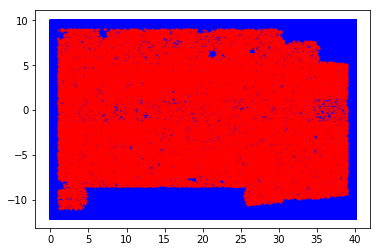

In [6]:
# print(len(raBKG[maskbit_cut]))
# print(len(decBKG[maskbit_cut]))


plt.scatter(raBKG[maskbit_cut], decBKG[maskbit_cut], c='blue', s=1)
plt.scatter(raLRG, decLRG, c='red', s=1)
plt.show()

In [9]:
def area_mod(raLRG, decLRG, nside, ra_BKG, dec_BKG, pixarea):

    import healpy as hp
    import numpy as np
    
    lrg_vec = hp.ang2vec(raLRG, decLRG, lonlat=True) # creates 3D position vector for LRGs
#     print('1. ', lrg_vec)
    
    find_pix_inner = hp.query_disc(nside, lrg_vec, radius=np.radians(0.4), nest=True) # finds pixels within 0.4 deg
#     print('2. ', len(find_pix_inner))
    
    find_pix_outer = hp.query_disc(nside, lrg_vec, radius=np.radians(0.5), nest=True) # finds pixels within 0.5 deg
#     print('3. ', len(find_pix_outer))
    
    annulus_pix = np.setdiff1d(find_pix_outer, find_pix_inner) # finds the differences in pix_inner and pix_outer, result is pix in annulus; returns values that are in arr1 but not in arr2
#     print('4. ', len(annulus_pix))
    
    bitmasked_pixels = hp.ang2pix(nside, ra_BKG, dec_BKG, nest=True, lonlat=True) # find pixels for bitmasked sources
#     print('5. ', len(bitmasked_pixels))
    
    bitmasked_intersect = np.intersect1d(annulus_pix, bitmasked_pixels) # find which pixels are in annulus
#     print('6. ', len(bitmasked_intersect))
    
    percent_excluded = ((pixarea * len(bitmasked_intersect)) / (pixarea * len(annulus_pix))) # what background area should be muliplied by to find better area approximation
#     print('7. ', percent_excluded)
    
#     print()
    return percent_excluded, annulus_pix, bitmasked_pixels, bitmasked_intersect
    



In [ ]:
import healpy as hp

nside = 1024*2
pixarea = hp.nside2pixarea(nside, degrees=True)
print(pixarea)

# ra = raLRG[0:10]
# dec = decLRG[0:10]

percent_excluded = []
annulus_pix = []
bitmasked_pixels = []
bitmasked_intersect = []
for i in range(len(raLRG)):
    temp1, temp2, temp3, temp4 = area_mod(raLRG[i], decLRG[i], nside, raBKG[maskbit_cut], decBKG[maskbit_cut], pixarea)
    percent_excluded.append(temp1)
    annulus_pix.append(temp2)
    bitmasked_pixels.append(temp3)
    bitmasked_intersect.append(temp4)
    print("finished ", i)
    

0.0008196227004015301
finished  0
finished  1
finished  2
finished  3
finished  4
finished  5
finished  6
finished  7
finished  8
finished  9
finished  10
finished  11
finished  12
finished  13
finished  14
finished  15
finished  16
finished  17
finished  18
finished  19
finished  20
finished  21
finished  22
finished  23
finished  24
finished  25
finished  26
finished  27
finished  28
finished  29
finished  30
finished  31
finished  32
finished  33
finished  34
finished  35
finished  36
finished  37
finished  38
finished  39
finished  40
finished  41
finished  42
finished  43
finished  44
finished  45
finished  46
finished  47
finished  48
finished  49
finished  50
finished  51
finished  52
finished  53
finished  54
finished  55
finished  56
finished  57
finished  58
finished  59
finished  60
finished  61
finished  62
finished  63
finished  64
finished  65
finished  66
finished  67
finished  68
finished  69
finished  70
finished  71
finished  72
finished  73
finished  74
finished  75


finished  592
finished  593
finished  594
finished  595
finished  596
finished  597
finished  598
finished  599
finished  600
finished  601
finished  602
finished  603
finished  604
finished  605
finished  606
finished  607
finished  608
finished  609
finished  610
finished  611
finished  612
finished  613
finished  614
finished  615
finished  616
finished  617
finished  618
finished  619
finished  620
finished  621
finished  622
finished  623
finished  624
finished  625
finished  626
finished  627
finished  628
finished  629
finished  630
finished  631
finished  632
finished  633
finished  634
finished  635
finished  636
finished  637
finished  638
finished  639
finished  640
finished  641
finished  642
finished  643
finished  644
finished  645
finished  646
finished  647
finished  648
finished  649
finished  650
finished  651
finished  652
finished  653
finished  654
finished  655
finished  656
finished  657
finished  658
finished  659
finished  660
finished  661
finished  662
finish

In [ ]:
# percent_excluded = np.asarray(percent_excluded)
# annulus_pix = np.asarray(annulus_pix)
# bitmasked_pixels = np.asarray(bitmasked_pixels)
# bitmasked_intersect = np.asarray(bitmasked_intersect)

# # print(percent_excluded[np.where(len(percent_excluded > 0))])
# print(np.median(percent_excluded))
# print(percent_excluded[0:5])


# percent_kept = 1.0 - percent_excluded
# print(percent_kept[0:5])
# print(len(percent_kept))
# print(np.median(percent_kept))

# np.savez('/Users/mtownsend/Documents/LRG_Data/percent_kept_v2.npz', percent_kept=percent_kept)
data_percent_kept = np.load('/Users/mtownsend/Documents/LRG_Data/percent_kept_v2.npz')
percentKept = data_percent_kept['percent_kept']
print(len(percentKept))
print(np.median(percent_kept))

In [ ]:
# intersect = np.asarray(bitmasked_intersect)
# print(intersect[0])

# bitmasked = []
# for i in range(len(intersect)):
#     temp = hp.pix2ang(nside, intersect[i], nest=True, lonlat=True)
#     bitmasked.append(temp)
    
# intersect = np.asarray(bitmasked)
# print(intersect[0][0])

nside = 1024*2

bits = hp.pix2ang(nside, bitmasked_intersect[1800], nest=True, lonlat=True)
print(len(bits[0]))
# print(bits[0])
# print(bits[1])
pix = hp.pix2ang(nside, annulus_pix[1800], nest=True, lonlat=True)

In [ ]:
# print(raLRG[0])
# print(decLRG[0])
# print(raLRG[1])
# print(decLRG[1])

print(percent_excluded[1800])

raTEMP = raLRG[1800]
decTEMP = decLRG[1800]

print(raTEMP)
print(decTEMP)

fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.scatter(bits[0], bits[1], color='blue', s=10)
ax.scatter(pix[0], pix[1], color='orange', s=10, alpha=0.5)
ax.scatter(raTEMP, decTEMP, color='red', marker='*', s=100)
ax.set_xlabel(r'$RA$ $(deg)$', fontsize=25)
ax.set_ylabel(r'$Dec$ $(deg)$', fontsize=25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

# plt.savefig('/Users/mtownsend/Desktop/edrLRGs.jpg')

plt.show()

In [ ]:
# # make HEALPix map with every source

ra = raLRG[0:10]
dec = decLRG[0:10]

# Make HEALPix map using just RA/Dec; end up with a density plot
num = 1024*2

nside = num
# nside = 64
npixel = hp.nside2npix(nside)
# print(npixel)

# Convert ra/dec into theta/phi
theta = []
phi = []

newRA = ra_BKG[np.where((ra_BKG > 243) & (ra_BKG < 245) & (dec_BKG < 9.6) & (dec_BKG > 8.6))]
newDEC = dec_BKG[np.where((ra_BKG > 243) & (ra_BKG < 245) & (dec_BKG < 9.6) & (dec_BKG > 8.6))]
print(len(newRA))

for i in range(len(ra_BKG)):
    theta.append(np.radians(90. - dec_BKG[i]))
    phi.append(np.radians(ra_BKG[i]))
    
m = hp.ang2pix(nside, theta, phi)
# m = bitmasked_intersect[1]
map_ = np.bincount(m, minlength=npixel)
print(map_[0:5])
hp.gnomview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# hp.gnomview(map_, xsize=60, rot=(-116., 9.), flip='geo', cmap='viridis', notext=True, title="", max=1)
# plt.scatter(raLRG, decLRG, s=50, c='red')
# hp.mollview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
plt.rcParams.update({'font.size':16})
# plt.title('HEALPix Map for All Randoms')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/22Jan2021/HEALPix-ALL2.jpg')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/27Jan2021/HEALPix-bitmasks.pdf')
plt.show()

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums = hp.ang2pix(nside, theta, phi, nest=True)
print(len(np.unique(pixnums)))
print(len(pixnums))
# print(hp.npix2nside(npixel))



ra = np.append(bits[0], raLRG[1000])
dec = np.append(bits[1], decLRG[1000])
    
theta = []
phi = []
    
for i in range(len(ra)):
    theta.append(np.radians(90. - dec[i]))
    phi.append(np.radians(ra[i]))
    
m = hp.ang2pix(nside, theta, phi)
# m = bitmasked_intersect[1]
map_ = np.bincount(m, minlength=npixel)
hp.gnomview(map_, xsize=60, rot=(-116., 9.), flip='geo', cmap='viridis', notext=True, title="")
# plt.scatter(raLRG, decLRG, s=50, c='red')
# hp.mollview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
plt.rcParams.update({'font.size':16})
# plt.title('HEALPix Map for All Randoms')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/22Jan2021/HEALPix-ALL2.jpg')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/27Jan2021/HEALPix-annulus-example.pdf')
plt.show()
